In [1]:
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
# import the necessary packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def sigmoid_activation(x):
    # compute the sigmoid activation value for a given input
    return 1.0 / (1 + np.exp(-x))

In [4]:
def predict(X, W):
    # take the dot product between our features and weight matrix
    preds = sigmoid_activation(np.dot(X, W))
    # apply a step function to threshold the outputs to binary
    # class labels
    preds[preds <= 0.5] = 0
    preds[preds > 0.5] = 1
    
    # return the predictions
    return preds

In [16]:
# num of epochs
epochs = 100
# learning rate
alpha = 0.01

In [17]:
# generate a 2-class classification problem with 1,000 data points,
# where each data point is a 2D feature vector
(X, y) = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=1.5, random_state=1)
y = y.reshape(-1, 1)

# insert a column of 1's as the last entry in the feature
# matrix -- this little trick allows us to treat the bias
# as a trainable parameter within the weight matrix
X = np.c_[X, np.ones((X.shape[0]))]

# partition the data into training and testing splits using 50% of 
# the data for training and the remaining 50% for testing
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size=0.5, random_state=42)

In [18]:
# initialize our weight matrix and list of losses
print("[INFO] training...")
W = np.random.randn(X.shape[1], 1)
losses = []

# loop over the desired number of epochs
for epoch in np.arange(0, epochs):
    # take the dot product between our features ‘X‘ and the weight
    # matrix ‘W‘, then pass this value through our sigmoid activation
    # function, thereby giving us our predictions on the dataset
    preds = sigmoid_activation(trainX.dot(W))
    
    # now that we have our predictions, we need to determine the
    # ‘error‘, which is the difference between our predictions and
    # the true values
    error = preds - trainY
    loss = np.sum(error ** 2)
    losses.append(loss)
    
    # the gradient descent update is the dot product between our
    # features and the error of the predictions
    gradient = trainX.T.dot(error)
    
    # in the update stage, all we need to do is "nudge" the weight
    # matrix in the negative direction of the gradient (hence the
    # term "gradient descent" by taking a small step towards a set
    # of "more optimal" parameters
    W += -alpha * gradient
    
    # check to see if an update should be displayed
    if epoch == 0 or (epoch + 1) % 5 == 0:
        print("[INFO] epoch={}, loss={:.7f}".format(int(epoch + 1), loss))

[INFO] training...
[INFO] epoch=1, loss=471.6832562
[INFO] epoch=5, loss=11.1629647
[INFO] epoch=10, loss=9.1771860
[INFO] epoch=15, loss=6.9966590
[INFO] epoch=20, loss=6.9686909
[INFO] epoch=25, loss=6.8236488
[INFO] epoch=30, loss=5.4614260
[INFO] epoch=35, loss=3.4174134
[INFO] epoch=40, loss=2.1924294
[INFO] epoch=45, loss=1.2529889
[INFO] epoch=50, loss=0.9924480
[INFO] epoch=55, loss=0.8577278
[INFO] epoch=60, loss=0.6115289
[INFO] epoch=65, loss=0.3399925
[INFO] epoch=70, loss=0.1729897
[INFO] epoch=75, loss=0.0933336
[INFO] epoch=80, loss=0.0553777
[INFO] epoch=85, loss=0.0357898
[INFO] epoch=90, loss=0.0247703
[INFO] epoch=95, loss=0.0180916
[INFO] epoch=100, loss=0.0137886


In [19]:
# evaluate our model
print("[INFO] evaluating...")
preds = predict(testX, W)
print(classification_report(testY, preds))

[INFO] evaluating...
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       250
           1       0.99      1.00      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



In [27]:
testY.shape

(500, 1)

ValueError: 'c' argument has 500 elements, which is not acceptable for use with 'x' with size 500, 'y' with size 500.

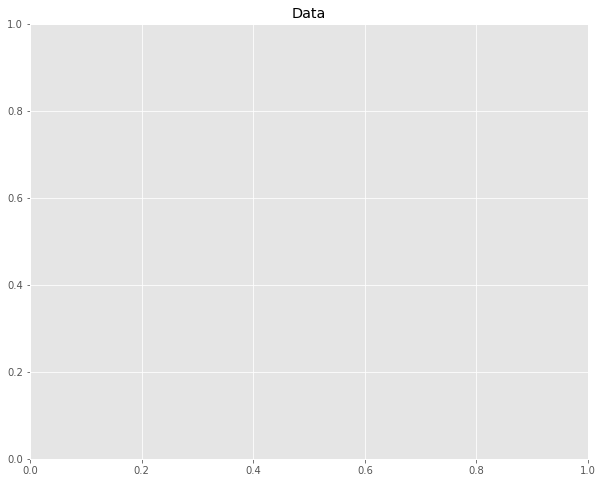

In [23]:
# plot the (testing) classification data
plt.style.use("ggplot")
plt.figure()
plt.title("Data")
plt.scatter(testX[:,0], testX[:,1], marker="o", c=testY, s=30)

# construct a figure that plots the loss over time
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()